In [1]:
pip install mlxtend

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('Customer Survey.xlsx')

In [3]:
!pip install -U --pre matplotlib  

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


In [4]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2021-05-30 07:28:41--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-05-30 07:28:41--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.2’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2021-05-30 07:28:41 (4.49 MB/s) - 

In [5]:
import matplotlib
import matplotlib.font_manager as fm

from os import path
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/blob/master/ofl/sarabun/Sarabun-Regular.ttf?raw=true -O Sarabun-Regular.ttf


In [8]:
df.head(5)

,Unnamed: 0,ประทับเวลา,Transaction,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20,11:53:45,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2021-03-20,11:54:01,2,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,2021-03-20,11:54:05,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20,11:54:13,4,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,2021-03-20,11:54:18,5,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [9]:
del df['Unnamed: 0']
del df['ประทับเวลา']

In [10]:
df.replace('ไม่เคย',0,inplace = True)
df.replace('เคย',1,inplace = True)
df.replace("",1,inplace = True)
df.fillna(0)
df.replace(np.nan, 0)
del df['Transaction']
df.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1


In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
df = df.applymap(encode_units)

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.522727,0.931818,0.500000,0.956522,1.026511,0.012913,1.568182
1,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.931818,0.522727,0.500000,0.536585,1.026511,0.012913,1.029904
2,(คอลลาเจน),(กระเป๋า),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
3,(กระเป๋า),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
4,(คอลลาเจน),(ชาบู),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
5,(ชาบู),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
6,(โรตี),(คอลลาเจน),0.954545,0.522727,0.522727,0.547619,1.047619,0.023760,1.055024
7,(คอลลาเจน),(โรตี),0.522727,0.954545,0.522727,1.000000,1.047619,0.023760,inf
8,(คอลลาเจน),(ครีมกันแดด),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
9,(ครีมกันแดด),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000


In [14]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.522727,0.931818,0.500000,0.956522,1.026511,0.012913,1.568182
1,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.931818,0.522727,0.500000,0.536585,1.026511,0.012913,1.029904
2,(คอลลาเจน),(กระเป๋า),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
3,(กระเป๋า),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
4,(คอลลาเจน),(ชาบู),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
322275,(กระเป๋า),"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ชาบู, หมูแดดเด...",1.000000,0.500000,0.500000,0.500000,1.000000,0.000000,1.000000
322276,(โรตี),"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ชาบู, หมูแดดเด...",0.954545,0.500000,0.500000,0.523810,1.047619,0.022727,1.050000
322277,(ครีมกันแดด),"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ชาบู, หมูแดดเด...",1.000000,0.500000,0.500000,0.500000,1.000000,0.000000,1.000000
322278,(แฟน ที่แปลว่าพัดลม),"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ชาบู, หมูแดดเด...",0.818182,0.545455,0.500000,0.611111,1.120370,0.053719,1.168831


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3592 missing from current font.
  font.set_text(s

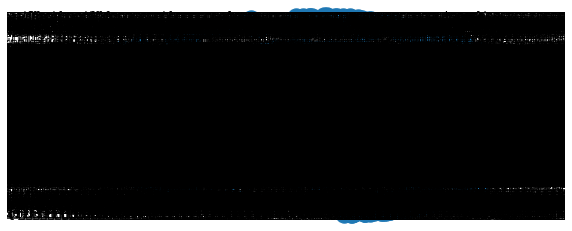

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [17]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [18]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [19]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [20]:
links_filtered=links.loc[ (links['value'] > 0.6) & 
                         (links['item'] != links['related item']) ]

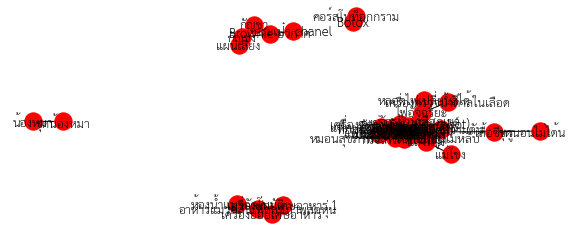

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax=plt.subplots(figsize=(10,4))

GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True,node_color="r",font_family='TH Sarabun New')
plt.show()

